<a href="https://colab.research.google.com/github/bonnke02/detectron2/blob/master/scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chapter 3: First steps with scikit-learn library; training a perceptron.
Perceptron is a learning algorithm for classification.
The scikit-learn library offers not only a large variety of learning algorithms, but also many convenient functiond to preprocess the data and to fine tune and evaluate our models.


In [ ]:
from sklearn import datasets
import numpy as np

iris =datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels: ', np.unique(y))

Class labels:  [0 1 2]


- The np.unique function returned the three inique class labels stored in iris target, and as we see the iris flower class names iris-setosa, iris-versicolor and iris-virginica are already stored as integers (0,1,2). (encoding class labels as integers is a common convention among most machine learning libraries.)

- To evaluate how well a trained model performs on unseen data, we will further split the data into separate training and test datasets.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

- Using the train_test_split function from scikit-learn's model_selection module, we randomly split the X and y arrays into 30% test data(45 samples) and 70% training data (105 samples). The function also shuffles the training data internally before splitting.
- Via the random_state parameter, we provide a fixed random seed for the internal psuedo-random number generator that is used for shuffling the data sets prior to the splitting. This ensures that our results are reproducible
- We used stratification via stratify=y, this means that the train_test_split method returns training and test subsets that have the same proportion as the input datasets. We can use numpy bincount function to check if this is really true.

In [ ]:
print('Labels counts in y:', np.bincount(y))

Labels counts in y: [50 50 50]


In [ ]:
print('Labels count in y_train: ', np.bincount(y_train))
print('Labels count in y_test: ', np.bincount(y_test))

Labels count in y_train:  [35 35 35]
Labels count in y_test:  [15 15 15]


- Many machine learning and optimising algorithms also require feature scaling for optimal performance.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

- We lloaded StandardScaler class from the preprocessing module and initiated a new StandardScaler object assigned to the sc variable.
- Using the fit, method StandardScaler estimated the parmeter u(sample mean) and o(standard deviation) for each feature dimension from the training data. By calling the transform method , we then standardized the training data using those estimated parameters to standardise the test set so that both values in the training and test datasets are comparable with each other.

In [ ]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, max_iter=40, random_state=1)

- max_iter or n_iter specifies the number of iterations(epoch) for which the algorithm should be train. In this case it will run 40 iterations
- eta0=0.1 this is the learning rate, which controls the step size duriich each update of the models weights. A value of0.1 means it will udate the weights in relatively small steps.
- random_state=1 this parameter sets the random seed to ensure reproducibility. It initializes the random number generator to the same state each time, making your results reproducible.

In [ ]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 1


- Having trained the model we can now make predictions via the predict method.
- We can see that the Perceptron misclassified one out of the 45 flower samples. Thus the misclassificaion error on the dataset is approximately 1/45 = 0.0222 which is 2.2%

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.98


- The scikit-learn library also implements a large variety of diffrent performance metrics that are available via the metrics module.
- Here the y_test are the true class label and y_pred are the class labe that we predicted previously.

Finally, we can use our plot_decision_regions functions to plot the decision regions of our newlly trained perceptron model and visualize how well it separetes the diffrent flower samples.

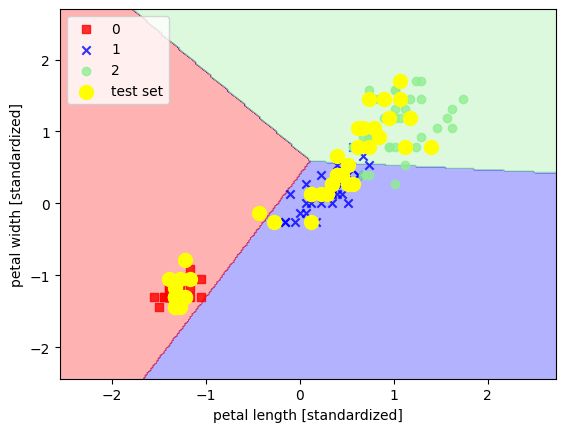

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all the samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='yellow', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='test set')

# Combine training and test datasets
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# Plot decision regions
plot_decision_regions(X_combined_std, y_combined, classifier=ppn, test_idx=range(105, 150))

# Set labels and legend
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()